               CONSUMO_REAL  SECCIO_CENSAL  NUM_MUN_SGAB  NUM_DTE_MUNI  \
CONSUMO_REAL       1.000000      -0.017323     -0.018172      0.000436   
SECCIO_CENSAL     -0.017323       1.000000      0.911055     -0.103662   
NUM_MUN_SGAB      -0.018172       0.911055      1.000000     -0.074724   
NUM_DTE_MUNI       0.000436      -0.103662     -0.074724      1.000000   
CODI_MODEL        -0.006857      -0.005570      0.000198      0.144499   
DIAM_COMP          0.253234      -0.056560     -0.052097     -0.024174   

               CODI_MODEL  DIAM_COMP  
CONSUMO_REAL    -0.006857   0.253234  
SECCIO_CENSAL   -0.005570  -0.056560  
NUM_MUN_SGAB     0.000198  -0.052097  
NUM_DTE_MUNI     0.144499  -0.024174  
CODI_MODEL       1.000000  -0.016915  
DIAM_COMP       -0.016915   1.000000  


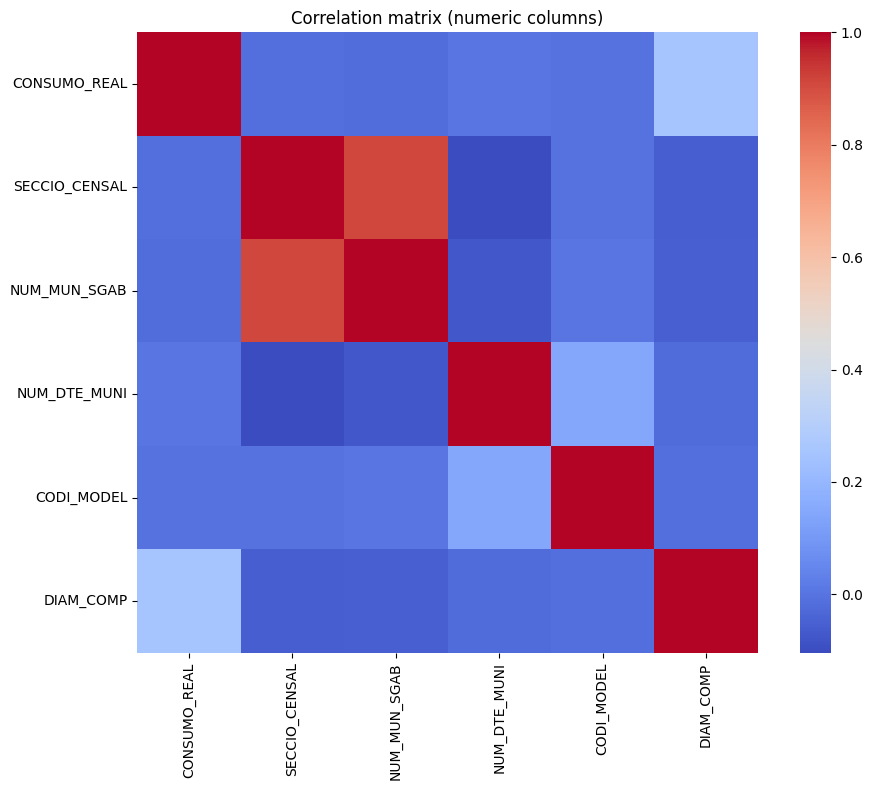

In [18]:
# Correlation matrix of numeric columns using DuckDB + pandas + seaborn
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

con = duckdb.connect()

# Load data (adjust LIMIT if you need sampling)
sample_df = con.execute(
    """
    SELECT *
    FROM 'Dades_Comptadors_anonymized.parquet'
    """
).df()

# Keep only numeric columns
num_df = sample_df.select_dtypes(include=["number"]).copy()

# Compute correlation matrix
corr = num_df.corr(numeric_only=True)
print(corr)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False, square=True)
plt.title("Correlation matrix (numeric columns)")
plt.tight_layout()
plt.show()